In [2]:
#1 - TaiwanPill資料夾影像分類&整理
import os
import shutil
import re

def organize_files(input_base_dir, output_base_dir):
    # 確認基底資料夾是否存在
    if not os.path.exists(input_base_dir):
        print(f"輸入目錄不存在: {input_base_dir}")
        return
    
    # 確保輸出基底資料夾存在
    os.makedirs(output_base_dir, exist_ok=True)
    
    # 遍歷輸入資料夾及其子資料夾
    for root, _, files in os.walk(input_base_dir):
        for file in files:
            # 僅處理 PNG 檔案
            if not file.endswith(".png"):
                continue
            
            # 分析路徑
            relative_path = os.path.relpath(root, input_base_dir)
            parts = relative_path.split(os.sep)
            
            if len(parts) < 2:
                print(f"路徑格式不正確，無法處理: {relative_path}")
                continue
            
            # 類別和次分類
            category = parts[0]  # 例如 capsule 或 pill
            sub_category = parts[1] if len(parts) > 1 else ""
            sub_category_prefix = sub_category[:3] if category.lower() == "pill" else ""
            category_prefix = category[0].lower()  # 類別的第一個字母
            
            # 從檔名中提取編號
            #match = re.search(r"第(\d{6})號", file)
            match = re.search(r"(\d{6})", file)
            if not match:
                print(f"檔名中找不到編號: {file}")
                continue
            number = match.group(1)
            
            # 創建目標資料夾名稱
            if category.lower() == "capsule":
                folder_name = f"{category_prefix}_{number}"
            elif category.lower() == "pill":
                folder_name = f"{category_prefix}_{sub_category_prefix}_{number}"
            else:
                print(f"未知類別: {category}")
                continue
            
            # 目標資料夾路徑
            target_dir = os.path.join(output_base_dir, folder_name)
            os.makedirs(target_dir, exist_ok=True)
            
            # 複製檔案到目標資料夾
            src_file = os.path.join(root, file)
            dst_file = os.path.join(target_dir, file)
            shutil.copy(src_file, dst_file)
            print(f"檔案已複製: {src_file} -> {dst_file}")

# 使用範例
input_directory = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_Match_Database_MattingbyLabel_Transparency"  # 原始基底目錄
output_directory = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_For_Classifier_Training_NonAUG_byLabel_Transparency"  # 輸出基底目錄
organize_files(input_directory, output_directory)

檔案已複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_Match_Database_MattingbyLabel_Transparency\capsule\10_2mm\029562_1_1734425692141.png -> C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_For_Classifier_Training_NonAUG_byLabel_Transparency\c_029562\029562_1_1734425692141.png
檔案已複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_Match_Database_MattingbyLabel_Transparency\capsule\10_2mm\029562_2_1734425692180.png -> C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_For_Classifier_Training_NonAUG_byLabel_Transparency\c_029562\029562_2_1734425692180.png
檔案已複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_Match_Database_MattingbyLabel_Transparency\capsule\14mm\013547_1_1734425640113.png -> C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_For_Classifier_Training_NonAUG_byLabel_Transparency\c_013547\013547_1_1734425640113.png
檔案已複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_Match_Database_Matt

In [ ]:
#2 - 用Xnconvert擴增

In [3]:
#3 - 切割#2的影像變成train/val(80%/20%)

import os
import shutil
import random

# 原始資料的路徑
DATASET_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_For_Classifier_Training_GaussianNoise_BasedOnAUG_byLabel_Transparency_DeleteRepeat"  # 原始資料集目錄
OUTPUT_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_Transparency_DeleteRepeat"    # 輸出資料集目錄

# 訓練集與驗證集比例
TRAIN_RATIO = 0.80  # 70% 用於訓練，30% 用於驗證

# 建立訓練集和驗證集的資料夾
train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir = os.path.join(OUTPUT_DIR, "val")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# 遍歷每個類別資料夾
for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    # 建立類別的訓練和驗證資料夾
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # 取得該類別的所有檔案，並隨機打亂
    files = os.listdir(class_path)
    random.shuffle(files)

    # 分割資料
    train_size = int(len(files) * TRAIN_RATIO)
    train_files = files[:train_size]
    val_files = files[train_size:]

    # 複製資料到對應的資料夾
    for file_name in train_files:
        shutil.copy(os.path.join(class_path, file_name), train_class_dir)
    for file_name in val_files:
        shutil.copy(os.path.join(class_path, file_name), val_class_dir)

print("資料分割完成！")

資料分割完成！


In [2]:
#InceptionV3

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2  # 確保匯入 l2 函式
import json

# 參數設定
IMG_HEIGHT, IMG_WIDTH = 299, 299  # InceptionV3 的預設輸入大小
BATCH_SIZE = 32
EPOCHS_1 = 50
EPOCHS_2 = 100
LEARNING_RATE = 0.0001
NUM_CLASSES = 1903 #請根據你的資料集調整類別數
MODEL_SAVE_PATH = "inceptionv3_best_model.h5"

# 資料路徑
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData/train"  # 訓練集目錄
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData/val"      # 驗證集目錄

# 資料增強
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # 像素值歸一化到 [0, 1]
    rotation_range=90,  # 隨機旋轉
    #width_shift_range=0.1,  # 水平平移
    #height_shift_range=0.1,  # 垂直平移
    #shear_range=0.1,  # 隨機剪切變換
    zoom_range=0.3,  # 隨機縮放
    #vertical_flip=True,  # 隨機垂直翻轉
    fill_mode="constant",  # 填充方式
    cval=0.
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 獲取類別名稱到索引的映射
class_indices = train_generator.class_indices

# 保存到 JSON 文件
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Class indices have been saved to class_indices.json")

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 載入 InceptionV3 預訓練模型，不包含分類層
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# 冻結預訓練模型的卷積層
base_model.trainable = False

# 添加自定義分類層
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
# 嵌入層：將1903類別壓縮到較低維度的空間
#embedding_output = Dense(128, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))(x)

# 建立模型
model = Model(inputs=base_model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 設置回調
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # 在 5 個 epoch 未改善時停止訓練
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    MODEL_SAVE_PATH,
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# 訓練模型（初始階段）
history = model.fit(
    train_generator,
    epochs=EPOCHS_1,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# 解凍部分層以進行微調（可選）
base_model.trainable = True
fine_tune_at = 249  # 解凍從哪一層開始
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 重新編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # 更低的學習率
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 微調模型
history_fine_tune = model.fit(
    train_generator,
    epochs=EPOCHS_2,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# 保存模型
model.save("inceptionv3_1903_2048_50_100_4.h5")
#inceptionv3_1903_1024_50_50_1
#有加高斯噪點1+高斯濾波3*3 含+-90、+180翻轉  ###效果還行，目前最好
#Epoch 48/50
#2374/2374 [==============================] - 167s 70ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.3655 - val_accuracy: 0.9104
#Epoch 49/50
#2374/2374 [==============================] - 173s 73ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.3669 - val_accuracy: 0.9095
#Epoch 50/50
#2374/2374 [==============================] - 169s 71ms/step - loss: 0.0269 - accuracy: 0.9904 - val_loss: 0.3621 - val_accuracy: 0.9110

#inceptionv3_1903_1024_50_50_2 含+-90、+180翻轉   ###不知道為啥只有訓練40代  重訓練
#高斯濾波5*5
#Epoch 38/40
#2374/2374 [==============================] - 160s 67ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.2657 - val_accuracy: 0.9377
#Epoch 39/40
#2374/2374 [==============================] - 160s 68ms/step - loss: 0.0306 - accuracy: 0.9892 - val_loss: 0.2692 - val_accuracy: 0.9384
#Epoch 40/40
#2374/2374 [==============================] - 161s 68ms/step - loss: 0.0286 - accuracy: 0.9898 - val_loss: 0.2748 - val_accuracy: 0.9372

#inceptionv3_1903_1024_50_50_3 含+-90、+180翻轉   ###跟2一樣，但是重訓練比較
#Epoch 38/40
#2374/2374 [==============================] - 159s 67ms/step - loss: 0.0311 - accuracy: 0.9883 - val_loss: 0.2716 - val_accuracy: 0.9389
#Epoch 39/40
#2374/2374 [==============================] - 158s 67ms/step - loss: 0.0297 - accuracy: 0.9895 - val_loss: 0.2813 - val_accuracy: 0.9372
#Epoch 40/40
#2374/2374 [==============================] - 158s 66ms/step - loss: 0.0284 - accuracy: 0.9895 - val_loss: 0.2774 - val_accuracy: 0.9375

#inceptionv3_1903_1024_50_50_4 含+-90、+180翻轉   ###新策略資料擴增+增加分類層
#Epoch 98/100
#2374/2374 [==============================] - ETA: 0s - loss: 0.1618 - accuracy: 0.9471
#Epoch 98: val_loss did not improve from 0.24133
#2374/2374 [==============================] - 656s 276ms/step - loss: 0.1618 - accuracy: 0.9471 - val_loss: 0.2616 - val_accuracy: 0.9389
#Epoch 99/100
#2374/2374 [==============================] - ETA: 0s - loss: 0.1574 - accuracy: 0.9482
#Epoch 99: val_loss did not improve from 0.24133
#2374/2374 [==============================] - 664s 280ms/step - loss: 0.1574 - accuracy: 0.9482 - val_loss: 0.2763 - val_accuracy: 0.9399

#inceptionv3_1903_2048_50_100_5 不含+-90、+180翻轉 只有模糊  ###用NonAUG+增加分類層
#Epoch 99/100
#187/187 [==============================] - ETA: 0s - loss: 0.7817 - accuracy: 0.8968
#Epoch 99: val_loss did not improve from 1.09137
#187/187 [==============================] - 91s 487ms/step - loss: 0.7817 - accuracy: 0.8968 - val_loss: 1.1235 - val_accuracy: 0.7930
#Epoch 100/100
#187/187 [==============================] - ETA: 0s - loss: 0.7811 - accuracy: 0.8943
#Epoch 100: val_loss did not improve from 1.09137
#187/187 [==============================] - 89s 477ms/step - loss: 0.7811 - accuracy: 0.8943 - val_loss: 1.1063 - val_accuracy: 0.8044

Found 5981 images belonging to 1903 classes.
Class indices have been saved to class_indices.json
Found 2019 images belonging to 1903 classes.
Epoch 1/50
187/187 [==============================] - ETA: 0s - loss: 16.2884 - accuracy: 0.0012
Epoch 1: val_loss improved from inf to 13.29749, saving model to inceptionv3_best_model.h5
187/187 [==============================] - 108s 545ms/step - loss: 16.2884 - accuracy: 0.0012 - val_loss: 13.2975 - val_accuracy: 0.0050
Epoch 2/50
187/187 [==============================] - ETA: 0s - loss: 11.9043 - accuracy: 0.0038
Epoch 2: val_loss improved from 13.29749 to 10.78004, saving model to inceptionv3_best_model.h5
187/187 [==============================] - 99s 531ms/step - loss: 11.9043 - accuracy: 0.0038 - val_loss: 10.7800 - val_accuracy: 0.0045
Epoch 3/50
187/187 [==============================] - ETA: 0s - loss: 10.0972 - accuracy: 0.0030
Epoch 3: val_loss improved from 10.78004 to 9.50710, saving model to inceptionv3_best_model.h5
187/187 [===

In [ ]:
#EfficientNet2VS

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import json

# 參數設定
IMG_HEIGHT, IMG_WIDTH = 384, 384  # EfficientNetV2S 的預設輸入大小
BATCH_SIZE = 16
EPOCHS = 50
LEARNING_RATE = 0.0001
NUM_CLASSES = 1903 #請根據你的資料集調整類別數
MODEL_SAVE_PATH = "efficientneyv2s_best_model.h5"

# 資料路徑
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData/train"  # 訓練集目錄
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData/val"      # 驗證集目錄

# 資料增強
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # 像素值歸一化到 [0, 1]
    #rotation_range=45, # 隨機旋轉
    #width_shift_range=0.1,  # 水平平移
    #height_shift_range=0.1,  # 垂直平移
    #shear_range=0.1,  # 隨機剪切變換
    #zoom_range=0.1,  # 隨機縮放
    #vertical_flip=True,  # 隨機垂直翻轉
    #fill_mode="nearest"  # 填充方式
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 獲取類別名稱到索引的映射
class_indices = train_generator.class_indices

# 保存到 JSON 文件
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Class indices have been saved to class_indices.json")

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 載入 EfficientNetV2S 預訓練模型，不包含分類層
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# 冻結預訓練模型的卷積層
base_model.trainable = False

# 添加自定義分類層
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2605, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# 建立模型
model = Model(inputs=base_model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 設置回調
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # 在 5 個 epoch 未改善時停止訓練
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    MODEL_SAVE_PATH,
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# 訓練模型（初始階段）
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# 解凍部分層以進行微調（可選）
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2  # 解凍一半層
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 重新編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # 更低的學習率
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 微調模型
history_fine_tune = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# 保存模型
model.save("efficientnetv2s_1024_50_50_1.h5")
#efficientnetv2s_1024_50_50_1
#


Found 37981 images belonging to 1903 classes.
Class indices have been saved to class_indices.json
Found 10019 images belonging to 1903 classes.
Epoch 1/50
 878/2374 [==========>...................] - ETA: 2:28 - loss: 7.5538 - accuracy: 0.0023

In [ ]:
#MobileNet

import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import json

# 參數設定
IMG_HEIGHT, IMG_WIDTH = 224, 224  # MobileNet 的預設輸入大小
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_CLASSES = 1903 #請根據你的資料集調整類別數
MODEL_SAVE_PATH = "mobilenet_best_model.h5"

# 資料路徑
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData/train"  # 訓練集目錄
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData/val"      # 驗證集目錄

# 資料增強
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # 像素值歸一化到 [0, 1]
    #rotation_range=45, # 隨機旋轉
    #width_shift_range=0.1,  # 水平平移
    #height_shift_range=0.1,  # 垂直平移
    #shear_range=0.1,  # 隨機剪切變換
    #zoom_range=0.1,  # 隨機縮放
    #vertical_flip=True,  # 隨機垂直翻轉
    #fill_mode="nearest"  # 填充方式
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 獲取類別名稱到索引的映射
class_indices = train_generator.class_indices

# 保存到 JSON 文件
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Class indices have been saved to class_indices.json")

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 載入 MobileNet 預訓練模型，不包含分類層
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# 冻結預訓練模型的卷積層
base_model.trainable = False

# 添加自定義分類層
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# 建立模型
model = Model(inputs=base_model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 設置回調
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # 在 5 個 epoch 未改善時停止訓練
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    MODEL_SAVE_PATH,
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

# 訓練模型（初始階段）
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# 保存模型
model.save("MobileNet_50_1.h5")
#MobileNet_49_1
#Epoch 48/60
#1187/1187 [==============================] - ETA: 0s - loss: 0.7618 - accuracy: 0.8698
#Epoch 48: val_loss improved from 1.49163 to 1.47911, saving model to mobilenet_best_model.h5
#1187/1187 [==============================] - 102s 86ms/step - loss: 0.7618 - accuracy: 0.8698 - val_loss: 1.4791 - val_accuracy: 0.7038
#Epoch 49/60
#1187/1187 [==============================] - ETA: 0s - loss: 0.7436 - accuracy: 0.8732
#Epoch 49: val_loss improved from 1.47911 to 1.46661, saving model to mobilenet_best_model.h5
#1187/1187 [==============================] - 103s 86ms/step - loss: 0.7436 - accuracy: 0.8732 - val_loss: 1.4666 - val_accuracy: 0.7065


Found 37981 images belonging to 1903 classes.
Class indices have been saved to class_indices.json
Found 10019 images belonging to 1903 classes.
Epoch 1/60
1187/1187 [==============================] - ETA: 0s - loss: 7.3816 - accuracy: 0.0124
Epoch 1: val_loss improved from inf to 6.09298, saving model to mobilenet_best_model.h5
1187/1187 [==============================] - 110s 90ms/step - loss: 7.3816 - accuracy: 0.0124 - val_loss: 6.0930 - val_accuracy: 0.0655
Epoch 2/60
1187/1187 [==============================] - ETA: 0s - loss: 5.8736 - accuracy: 0.0676
Epoch 2: val_loss improved from 6.09298 to 5.30634, saving model to mobilenet_best_model.h5
1187/1187 [==============================] - 104s 88ms/step - loss: 5.8736 - accuracy: 0.0676 - val_loss: 5.3063 - val_accuracy: 0.1655
Epoch 3/60
1187/1187 [==============================] - ETA: 0s - loss: 5.1000 - accuracy: 0.1426
Epoch 3: val_loss improved from 5.30634 to 4.77047, saving model to mobilenet_best_model.h5
1187/1187 [=======

C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

Found 22090 images belonging to 1845 classes.
原始圖片範圍 (增強後):
Min: -123.68 Max: 151.061 Mean: -12.03117


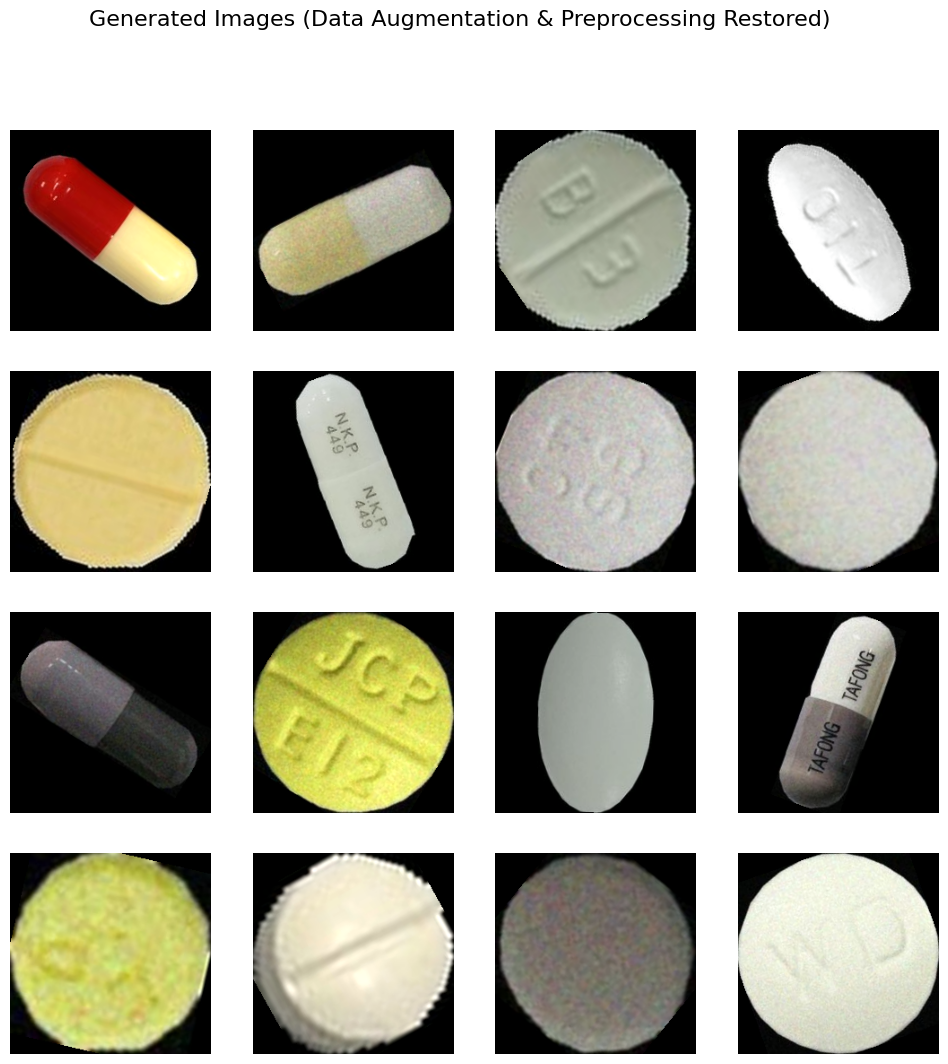

Class indices have been saved to class_indices.json
Found 7350 images belonging to 1845 classes.
Epoch 1/70
1381/1381 [==============================] - ETA: 0s - loss: 5.2850 - accuracy: 0.2083
Epoch 1: val_loss improved from inf to 3.10027, saving model to ResNet50_checkpoints\epoch_01_val_loss_3.1003.h5
1381/1381 [==============================] - 271s 192ms/step - loss: 5.2850 - accuracy: 0.2083 - val_loss: 3.1003 - val_accuracy: 0.5420 - lr: 1.0000e-04
Epoch 2/70
1381/1381 [==============================] - ETA: 0s - loss: 2.8549 - accuracy: 0.5944
Epoch 2: val_loss improved from 3.10027 to 2.31956, saving model to ResNet50_checkpoints\epoch_02_val_loss_2.3196.h5
1381/1381 [==============================] - 251s 181ms/step - loss: 2.8549 - accuracy: 0.5944 - val_loss: 2.3196 - val_accuracy: 0.7517 - lr: 1.0000e-04
Epoch 3/70
1381/1381 [==============================] - ETA: 0s - loss: 2.2750 - accuracy: 0.7483
Epoch 3: val_loss improved from 2.31956 to 2.00791, saving model to Res

In [1]:
#ResNet50
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, BatchNormalization, GlobalAveragePooling2D, Dropout, Reshape, Multiply
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.activations import swish
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.image import DirectoryIterator
import json
from tensorflow.keras.optimizers import Adam
import cv2

# 參數設定
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS_1 = 70
EPOCHS_2 = 150
PATIENCE = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 1845 #請根據你的資料集調整類別數
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/train"
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/val"
    
# 自定義的順序模組
def build_sequential_block(x, units=512, dropout_rate=0.5):
    x = BatchNormalization()(x)  # 加入 Batch Normalization
    x = Dropout(dropout_rate)(x)  # 加入 Dropout
    x = Dense(units, activation='relu')(x)  # 添加 Dense 層，激活函數為 ReLU
    return x

def se_block(input_tensor, ratio=12): #ratio 8會無法收斂
    """ Squeeze-and-Excitation (SE) Block """
    channel_axis = -1
    channels = input_tensor.shape[channel_axis]
    
    x = GlobalAveragePooling2D()(input_tensor)
    x = Reshape((1, 1, channels))(x)
    
    x = Dense(channels // ratio, activation=swish)(x)
    x = Dense(channels, activation='hard_sigmoid')(x)
    
    # Scale
    x = Multiply()([input_tensor, x])
    return x

# ResNet50分類層+SE
'''
def create_model():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False  # 冻結 ResNet50 的預訓練層

    # 解凍最後一個 block
    for layer in base_model.layers[-30:]:  # 假設 ResNet50 最後 30 層解凍
        layer.trainable = True
        
    # 添加自定義分類層
    x = base_model.output
    x = se_block(x)  # 添加 Squeeze-and-Excitation Block
    x = GlobalAveragePooling2D()(x)  # 平均池化，展平特徵圖
    x = build_sequential_block(x, units=2048, dropout_rate=0.5)  # 第一個順序模組
    #x = build_sequential_block(x, units=256, dropout_rate=0.5)  # 第二個順序模組
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    return model
'''
# ResNet50淺層+深層加上SE
def create_model():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False

    # 提取多層特徵圖
    c2 = base_model.get_layer("conv2_block3_out").output  # 較淺層特徵
    c3 = base_model.get_layer("conv3_block4_out").output
    c5 = base_model.output  # 最深層特徵

    # 添加 SE 模組強化不同層
    c2 = se_block(c2)
    c3 = se_block(c3)
    c5 = se_block(c5)

    # 上採樣並拼接特徵圖
    from tensorflow.keras.layers import UpSampling2D, Concatenate
    # 修改 c5_up 上採樣，使其達到 (56, 56)
    c3_up = UpSampling2D(size=(2, 2))(c3)      # (56, 56, 512)
    c5_up = UpSampling2D(size=(4, 4))(c5)      # 原來是 (28, 28, 2048)
    c5_up = UpSampling2D(size=(2, 2))(c5_up)   # 再次上採樣到 (56, 56, 2048)
    
    # 確保所有特徵圖維度一致後再拼接
    x = Concatenate()([c2, c3_up, c5_up])  # (56, 56, 通道總和)
    x = GlobalAveragePooling2D()(x)        # 平均池化
    x = build_sequential_block(x, units=2048, dropout_rate=0.5)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model
    
# 資料增強
train_datagen = ImageDataGenerator(
    #rescale=1.0 / 255,  # 像素值歸一化到 [0, 1]
    preprocessing_function=preprocess_input,
    rotation_range=180, # 隨機旋轉
    brightness_range=[0.8, 1.1],
    #zoom_range=[1.0, 1.5],  # 隨機縮放
    fill_mode="constant",  # 填充方式
    cval=0.
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 取得一批增強後的圖片
images, labels = next(train_generator)

# 檢查數據範圍
print("原始圖片範圍 (增強後):")
print("Min:", np.min(images), "Max:", np.max(images), "Mean:", np.mean(images))
# 還原預處理後的圖片範圍如果使用
images_restored = images + [103.939, 116.779, 123.68]  # 加回 ImageNet 均值
images_restored = np.clip(images_restored, 0, 255).astype(np.uint8)  # 限制 0~255 並轉為 uint8

# 顯示圖片
plt.figure(figsize=(12, 12))
for i in range(16):  # 顯示 16 張圖片
    plt.subplot(4, 4, i + 1)
    plt.imshow(images_restored[i][..., ::-1])  # 將 BGR 轉換成 RGB
    plt.axis('off')
plt.suptitle("Generated Images (Data Augmentation & Preprocessing Restored)", fontsize=16)
plt.show()

# 獲取類別名稱到索引的映射
class_indices = train_generator.class_indices
# 保存到 JSON 文件
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Class indices have been saved to class_indices.json")

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 建立模型
model = create_model()

# 編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    filepath="ResNet50_checkpoints/epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 設置回調
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6,
    verbose=1
)

# 訓練模型（初始階段）
history = model.fit(
    train_generator,
    epochs=EPOCHS_1,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# 解凍模型並重新訓練
model.trainable = True
for layer in model.layers:
    layer.trainable = True  # 解凍所有層
    
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # 降低學習率
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# 微調模型
history_fine_tune = model.fit(
    train_generator,
    initial_epoch=(EPOCHS_1),
    epochs=EPOCHS_2,
    validation_data=val_generator,
    callbacks=[checkpoint, reduce_lr]
)

# 保存模型
model.save("ResNet50_checkpoints/model_full.h5")

In [ ]:
#ResNet50 + Triplet Loss
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 常量設置
IMG_SIZE = 224
EMBEDDING_DIM = 256
EXTRA_DENSE_UNITS = 256
MARGIN = 4.0
BATCH_SIZE = 8
EPOCHS_1 = 10
EPOCHS_2 = 50
PATIENCE = 5
INITIAL_LR = 0.0001
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel__Transparency_DeleteRepeat/train"
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel__Transparency_DeleteRepeat/val"

# 隨機調整亮度
def adjust_brightness_randomly(image, delta=0.3):
    return tf.image.random_brightness(image, max_delta=delta)
# 隨機旋轉
def random_rotate(image, max_angle=45):
    angle = random.uniform(-max_angle, max_angle) * np.pi / 180.0  # 將角度轉換為弧度
    return tfa.image.rotate(image, angle)
# 隨機縮放
def random_zoom(image, zoom_factor_range=(0.6, 1.0)):
    zoom_factor = random.uniform(zoom_factor_range[0], zoom_factor_range[1])  # 隨機縮放因子
    height, width, _ = image.shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    image = tf.image.resize(image, (new_height, new_width))
    # 確保圖片尺寸為224x224
    return tf.image.resize_with_crop_or_pad(image, target_height=IMG_SIZE, target_width=IMG_SIZE)

# 整合所有增強功能的函數
def augment_image(image):
    # 隨機旋轉
    image = random_rotate(image)
    # 隨機縮放
    image = random_zoom(image)
    # 隨機亮度調整
    image = adjust_brightness_randomly(image, delta=0.1)
    return image
    
# Triplet Loss Function
def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    positive_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    negative_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    loss = tf.maximum(positive_dist - negative_dist + MARGIN, 0.0)
    return tf.reduce_mean(loss)

def triplet_accuracy(y_true, y_pred):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    
    # Calculate Euclidean distances between anchor-positive and anchor-negative pairs
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    
    # Correct triplet is when anchor is closer to positive than to negative
    correct = tf.cast(pos_dist < neg_dist, tf.float32)
    return tf.reduce_mean(correct)  # Mean accuracy across the batch
    
# Embedding Model
def create_embedding_model():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    # 凍結ResNet50的預訓練層
    for layer in base_model.layers:
        layer.trainable = False
    x = Flatten()(base_model.output)

    # 添加額外的 Dense 層
    #x = Dense(EXTRA_DENSE_UNITS, activation="relu")(x)
    #x = BatchNormalization()(x)  # 批正規化
    #x = Dropout(0.5)(x)  # Dropout 防止過擬合
    
    x = Dense(EMBEDDING_DIM, activation="relu")(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Triplet Model
def create_triplet_model():
    embedding_model = create_embedding_model()
    input_anchor = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="anchor")
    input_positive = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="positive")
    input_negative = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="negative")
    
    anchor_embedding = embedding_model(input_anchor)
    positive_embedding = embedding_model(input_positive)
    negative_embedding = embedding_model(input_negative)
    
    output = Lambda(lambda x: tf.stack(x, axis=1))([anchor_embedding, positive_embedding, negative_embedding])
    triplet_model = Model(inputs=[input_anchor, input_positive, input_negative], outputs=output)
    return triplet_model, embedding_model

# 解凍ResNet50的層
def unfreeze_resnet50(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.models.Model):  # 針對ResNet50部分
            for sub_layer in layer.layers:
                sub_layer.trainable = True
    print("ResNet50 layers unfrozen.")

# Load Image Paths and Labels
def load_image_paths_and_labels(base_dir):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(base_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(class_to_index[class_name])
    
    return image_paths, labels, class_to_index

# Data Generator for Triplets
class TripletDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size):
        self.image_paths = np.array(image_paths)
        self.labels = np.array(labels)
        self.batch_size = batch_size
        self.num_classes = len(np.unique(labels))
        
        self.class_to_images = {label: [] for label in range(self.num_classes)}
        for img_path, label in zip(self.image_paths, self.labels):
            self.class_to_images[label].append(img_path)
    
    def __len__(self):
        return len(self.image_paths) // self.batch_size
    
    def __getitem__(self, idx):
        anchors, positives, negatives = [], [], []
        for _ in range(self.batch_size):
            positive_class = random.choice(list(self.class_to_images.keys()))
            positive_images = self.class_to_images[positive_class]
            
            if len(positive_images) < 2:
                continue
            
            anchor_img, positive_img = random.sample(positive_images, 2)
            anchors.append(self.load_and_preprocess(anchor_img))
            positives.append(self.load_and_preprocess(positive_img))
            
            negative_class = random.choice([cls for cls in self.class_to_images.keys() if cls != positive_class])
            negative_img = random.choice(self.class_to_images[negative_class])
            negatives.append(self.load_and_preprocess(negative_img))
        
        return [np.array(anchors), np.array(positives), np.array(negatives)], np.zeros((self.batch_size, 1))
    
    def load_and_preprocess(self, img_path):
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img) / 255.0
        img = tf.convert_to_tensor(img, dtype=tf.float32)
        img = augment_image(img)
        return img
        
class SaveEmbeddingCallback(tf.keras.callbacks.Callback):
    def __init__(self, embedding_model, save_path):
        super(SaveEmbeddingCallback, self).__init__()
        self.embedding_model = embedding_model
        self.save_path = save_path
    
    def on_epoch_end(self, epoch, logs=None):
        save_file = os.path.join(self.save_path, f"embedding_model_epoch_{epoch + 1}.h5")
        self.embedding_model.save(save_file)
        print(f"Embedding model saved to {save_file}")

# Load train and val data
train_image_paths, train_labels, class_to_index = load_image_paths_and_labels(TRAIN_DIR)
val_image_paths, val_labels, _ = load_image_paths_and_labels(VAL_DIR)

train_gen = TripletDataGenerator(train_image_paths, train_labels, BATCH_SIZE)
val_gen = TripletDataGenerator(val_image_paths, val_labels, BATCH_SIZE)

sample_data = train_gen[0]
print(f"Anchors: {sample_data[0][0].shape}")
print(f"Positives: {sample_data[0][1].shape}")
print(f"Negatives: {sample_data[0][2].shape}")
# 绘制这些图片
plt.figure(figsize=(12, 12))

# 显示锚点图片（Anchors）
for i in range(min(3, len(sample_data[0][0]))):  # 限制显示最多3个样本
    plt.subplot(4, 4, i + 1)  # 将锚点放在每一行的第1个位置
    plt.imshow(sample_data[0][0][i])  # 显示单张图片
    plt.axis('off')  # 去掉坐标轴
    plt.title(f"Anchor {i + 1}")  # 标题标明锚点

# 显示正样本图片（Positives）
for i in range(min(3, len(sample_data[0][1]))):  # 限制显示最多3个样本
    plt.subplot(4, 4, i + 4)  # 将正样本放在每一行的第2个位置
    plt.imshow(sample_data[0][1][i])  # 显示单张图片
    plt.axis('off')  # 去掉坐标轴
    plt.title(f"Positive {i + 1}")  # 标题标明正样本

# 显示负样本图片（Negatives）
for i in range(min(3, len(sample_data[0][2]))):  # 限制显示最多3个样本
    plt.subplot(4, 4, i + 7)  # 将负样本放在每一行的第3个位置
    plt.imshow(sample_data[0][2][i])  # 显示单张图片
    plt.axis('off')  # 去掉坐标轴
    plt.title(f"Negative {i + 1}")  # 标题标明负样本

plt.suptitle("Anchors, Positives, and Negatives", fontsize=16)  # 总标题
plt.tight_layout()  # 防止标题重叠
plt.subplots_adjust(top=0.9)  # 调整顶部空白
plt.show()

# Create Model
triplet_model, embedding_model = create_triplet_model()

# Compile Model
triplet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
    loss=triplet_loss,
    metrics=[triplet_accuracy]  # Add the custom accuracy metric
)

# 保存嵌入模型的回調
embedding_save_callback = SaveEmbeddingCallback(
    embedding_model=embedding_model,
    save_path="ResNet50_TripletLoss_checkpoints"
)

# Callbacks
checkpoint = ModelCheckpoint(
    filepath="ResNet50_TripletLoss_checkpoints/epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss", 
    patience=PATIENCE, 
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6,
    verbose=1
)

# Train Model
history = triplet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_1,  # 前半訓練凍結
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# 解凍模型並重新訓練
unfreeze_resnet50(triplet_model)
triplet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR/10),
    loss=triplet_loss,
    metrics=[triplet_accuracy]  # Add the custom accuracy metric
)

history_unfreeze = triplet_model.fit(
    train_gen,
    validation_data=val_gen,
    initial_epoch=(EPOCHS_1),
    epochs=EPOCHS_2,  # 後半訓練解凍
    #callbacks=[checkpoint, early_stopping, reduce_lr]
    callbacks=[checkpoint, reduce_lr, embedding_save_callback]
)

# Save Full Model
triplet_model.save("ResNet50_TripletLoss_checkpoints/triplet_model_full.h5")
# 存分類層
#embedding_model = create_embedding_model()
embedding_model.save("ResNet50_TripletLoss_checkpoints/embedding_model_full.h5")

C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

Anchors: (5, 224, 224, 3)
Positives: (5, 224, 224, 3)
Negatives: (5, 224, 224, 3)


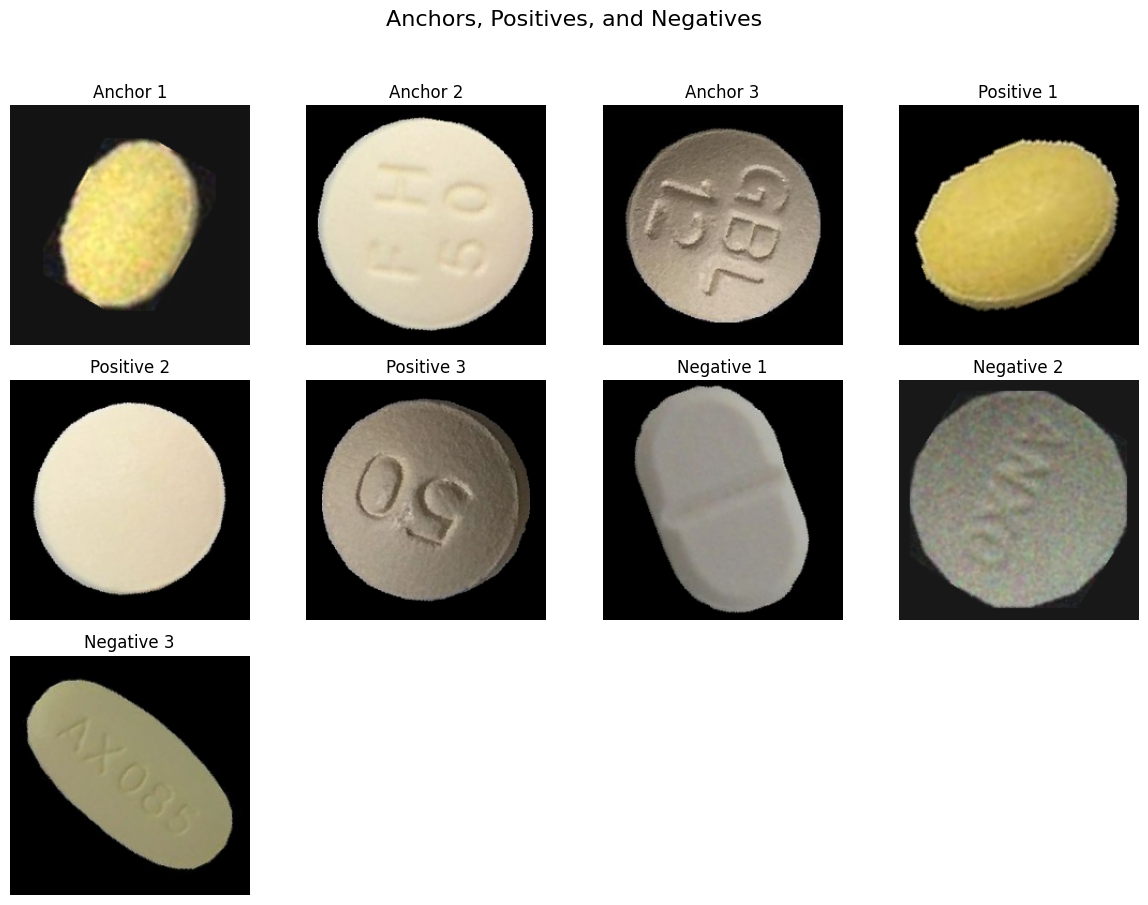

Batch 0 generated successfully: 7 triplets.
Batch 1 generated successfully: 6 triplets.
Batch 2 generated successfully: 5 triplets.
Batch 3 generated successfully: 6 triplets.
Batch 4 generated successfully: 7 triplets.
Epoch 1/10
2761/2761 [==============================] - ETA: 0s - loss: 1.3679 - triplet_accuracy: 0.8934
Epoch 1: val_loss improved from inf to 0.95052, saving model to ResNet50_TripletLoss_checkpoints\epoch_01_val_loss_0.9505.h5
2761/2761 [==============================] - 5188s 2s/step - loss: 1.3679 - triplet_accuracy: 0.8934 - val_loss: 0.9505 - val_triplet_accuracy: 0.9304 - lr: 1.0000e-04
Epoch 2/10
2414/2761 [=========================>....] - ETA: 9:29 - loss: 0.9625 - triplet_accuracy: 0.9308

In [ ]:
#ResNet50 + Triplet Loss(Hard)
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# 常量設置
IMG_SIZE = 224
EMBEDDING_DIM = 256
MARGIN = 4.0
BATCH_SIZE = 8
EPOCHS_1 = 10
EPOCHS_2 = 30
PATIENCE = 5
INITIAL_LR = 0.0001
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/train"
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/val"

# 隨機調整亮度
def adjust_brightness_randomly(image, delta=0.3):
    return tf.image.random_brightness(image, max_delta=delta)
# 隨機旋轉
def random_rotate(image, max_angle=45):
    angle = random.uniform(-max_angle, max_angle) * np.pi / 180.0  # 將角度轉換為弧度
    return tfa.image.rotate(image, angle)
# 隨機縮放
def random_zoom(image, zoom_factor_range=(0.6, 1.0)):
    zoom_factor = random.uniform(zoom_factor_range[0], zoom_factor_range[1])  # 隨機縮放因子
    height, width, _ = image.shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    image = tf.image.resize(image, (new_height, new_width))
    # 確保圖片尺寸為224x224
    return tf.image.resize_with_crop_or_pad(image, target_height=IMG_SIZE, target_width=IMG_SIZE)

# 整合所有增強功能的函數
def augment_image(image):
    # 隨機旋轉
    image = random_rotate(image)
    # 隨機縮放
    image = random_zoom(image)
    # 隨機亮度調整
    image = adjust_brightness_randomly(image, delta=0.1)
    return image
    
# Triplet Loss Function
def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    positive_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    negative_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    loss = tf.maximum(positive_dist - negative_dist + MARGIN, 0.0)
    return tf.reduce_mean(loss)

def triplet_accuracy(y_true, y_pred):
    anchor, positive, negative = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    
    # Calculate Euclidean distances between anchor-positive and anchor-negative pairs
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    
    # Correct triplet is when anchor is closer to positive than to negative
    correct = tf.cast(pos_dist < neg_dist, tf.float32)
    return tf.reduce_mean(correct)  # Mean accuracy across the batch
    
# Embedding Model
def create_embedding_model():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    # 凍結ResNet50的預訓練層
    for layer in base_model.layers:
        layer.trainable = False
        
    x = Flatten()(base_model.output)
    x = Dense(EMBEDDING_DIM, activation="relu")(x)
    #x = BatchNormalization()(x)  # 再次正規化
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Triplet Model
def create_triplet_model():
    embedding_model = create_embedding_model()
    input_anchor = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="anchor")
    input_positive = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="positive")
    input_negative = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="negative")
    
    anchor_embedding = embedding_model(input_anchor)
    positive_embedding = embedding_model(input_positive)
    negative_embedding = embedding_model(input_negative)
    
    output = Lambda(lambda x: tf.stack(x, axis=1))([anchor_embedding, positive_embedding, negative_embedding])
    triplet_model = Model(inputs=[input_anchor, input_positive, input_negative], outputs=output)
    return triplet_model, embedding_model

# 解凍ResNet50的層
def unfreeze_resnet50(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.models.Model):  # 針對ResNet50部分
            for sub_layer in layer.layers:
                sub_layer.trainable = True
    print("ResNet50 layers unfrozen.")

# Load Image Paths and Labels
def load_image_paths_and_labels(base_dir):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(base_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(class_to_index[class_name])
    
    return image_paths, labels, class_to_index

# Data Generator for Triplets
class TripletDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size):
        self.image_paths = np.array(image_paths)
        self.labels = np.array(labels)
        self.batch_size = batch_size
        self.num_classes = len(np.unique(labels))
        
        self.class_to_images = {label: [] for label in range(self.num_classes)}
        for img_path, label in zip(self.image_paths, self.labels):
            self.class_to_images[label].append(img_path)
    
    def __len__(self):
        return len(self.image_paths) // self.batch_size
    
    def __getitem__(self, idx):
        anchors, positives, negatives = [], [], []
        for _ in range(self.batch_size):
            positive_class = random.choice(list(self.class_to_images.keys()))
            positive_images = self.class_to_images[positive_class]
            
            if len(positive_images) < 2:
                continue
            
            anchor_img, positive_img = random.sample(positive_images, 2)
            anchor = self.load_and_preprocess(anchor_img)
            positive = self.load_and_preprocess(positive_img)
            
            negative_class = random.choice([cls for cls in self.class_to_images.keys() if cls != positive_class])
            negative_images = self.class_to_images[negative_class]
            
            hardest_negative = None
            hardest_dist_neg = float('inf')
            
            for negative_img in negative_images:
                negative = self.load_and_preprocess(negative_img)
                anchor_feature = tf.reduce_mean(anchor, axis=[0, 1]).numpy()
                positive_feature = tf.reduce_mean(positive, axis=[0, 1]).numpy()
                negative_feature = tf.reduce_mean(negative, axis=[0, 1]).numpy()
                
                dist_pos = euclidean_distances([anchor_feature], [positive_feature])[0][0]
                dist_neg = euclidean_distances([anchor_feature], [negative_feature])[0][0]
                
                if dist_neg < hardest_dist_neg:
                    hardest_negative = negative
                    hardest_dist_neg = dist_neg
            
            if hardest_negative is not None and hardest_dist_neg < dist_pos + 0.1:  # 添加允許的距離閾值
                anchors.append(anchor)
                positives.append(positive)
                negatives.append(hardest_negative)
        
        if len(anchors) == 0:
            print(f"Empty batch generated at index {idx}. Skipping batch.")
            return self.__getitem__((idx + 1) % len(self))
        #elif len(anchors) < self.batch_size:
            #print(f"Incomplete batch generated at index {idx}. Returning partial batch.")
        return [np.array(anchors), np.array(positives), np.array(negatives)], np.zeros((len(anchors), 1))
        
    def load_and_preprocess(self, img_path):
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img) / 255.0
        img = tf.convert_to_tensor(img, dtype=tf.float32)
        img = augment_image(img)
        return img
        
class SaveEmbeddingCallback(tf.keras.callbacks.Callback):
    def __init__(self, embedding_model, save_path):
        super(SaveEmbeddingCallback, self).__init__()
        self.embedding_model = embedding_model
        self.save_path = save_path
    
    def on_epoch_end(self, epoch, logs=None):
        save_file = os.path.join(self.save_path, f"embedding_model_epoch_{epoch + 1}.h5")
        self.embedding_model.save(save_file)
        print(f"Embedding model saved to {save_file}")

# Load train and val data
train_image_paths, train_labels, class_to_index = load_image_paths_and_labels(TRAIN_DIR)
val_image_paths, val_labels, _ = load_image_paths_and_labels(VAL_DIR)

train_gen = TripletDataGenerator(train_image_paths, train_labels, BATCH_SIZE)
val_gen = TripletDataGenerator(val_image_paths, val_labels, BATCH_SIZE)

sample_data = train_gen[0]
print(f"Anchors: {sample_data[0][0].shape}")
print(f"Positives: {sample_data[0][1].shape}")
print(f"Negatives: {sample_data[0][2].shape}")
# 绘制这些图片
plt.figure(figsize=(12, 12))

# 显示锚点图片（Anchors）
for i in range(min(3, len(sample_data[0][0]))):  # 限制显示最多3个样本
    plt.subplot(4, 4, i + 1)  # 将锚点放在每一行的第1个位置
    plt.imshow(sample_data[0][0][i])  # 显示单张图片
    plt.axis('off')  # 去掉坐标轴
    plt.title(f"Anchor {i + 1}")  # 标题标明锚点

# 显示正样本图片（Positives）
for i in range(min(3, len(sample_data[0][1]))):  # 限制显示最多3个样本
    plt.subplot(4, 4, i + 4)  # 将正样本放在每一行的第2个位置
    plt.imshow(sample_data[0][1][i])  # 显示单张图片
    plt.axis('off')  # 去掉坐标轴
    plt.title(f"Positive {i + 1}")  # 标题标明正样本

# 显示负样本图片（Negatives）
for i in range(min(3, len(sample_data[0][2]))):  # 限制显示最多3个样本
    plt.subplot(4, 4, i + 7)  # 将负样本放在每一行的第3个位置
    plt.imshow(sample_data[0][2][i])  # 显示单张图片
    plt.axis('off')  # 去掉坐标轴
    plt.title(f"Negative {i + 1}")  # 标题标明负样本

plt.suptitle("Anchors, Positives, and Negatives", fontsize=16)  # 总标题
plt.tight_layout()  # 防止标题重叠
plt.subplots_adjust(top=0.9)  # 调整顶部空白
plt.show()

for i in range(5):  # 測試前5個批次
    try:
        sample_data = train_gen[i]
        print(f"Batch {i} generated successfully: {len(sample_data[0][0])} triplets.")
    except Exception as e:
        print(f"Error generating batch {i}: {e}")

# Create Model
triplet_model, embedding_model = create_triplet_model()

# Compile Model
triplet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
    loss=triplet_loss,
    metrics=[triplet_accuracy]  # Add the custom accuracy metric
)

# 保存嵌入模型的回調
embedding_save_callback = SaveEmbeddingCallback(
    embedding_model=embedding_model,
    save_path="ResNet50_TripletLoss_checkpoints"
)

# Callbacks
checkpoint = ModelCheckpoint(
    filepath="ResNet50_TripletLoss_checkpoints/epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss", 
    patience=PATIENCE, 
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6,
    verbose=1
)

# Train Model
history = triplet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_1,  # 前半訓練凍結
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# 解凍模型並重新訓練
unfreeze_resnet50(triplet_model)
triplet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR/10),
    loss=triplet_loss,
    metrics=[triplet_accuracy]  # Add the custom accuracy metric
)

history_unfreeze = triplet_model.fit(
    train_gen,
    validation_data=val_gen,
    initial_epoch=(EPOCHS_1),
    epochs=EPOCHS_2,  # 後半訓練解凍
    #callbacks=[checkpoint, early_stopping, reduce_lr]
    callbacks=[checkpoint, reduce_lr, embedding_save_callback]
)

# Save Full Model
triplet_model.save("ResNet50_TripletLoss_checkpoints/triplet_model_full.h5")
# 存分類層
#embedding_model = create_embedding_model()
embedding_model.save("ResNet50_TripletLoss_checkpoints/embedding_model_full.h5")

C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

Found 22090 images belonging to 1845 classes.
Image batch shape: (16, 300, 300, 3)


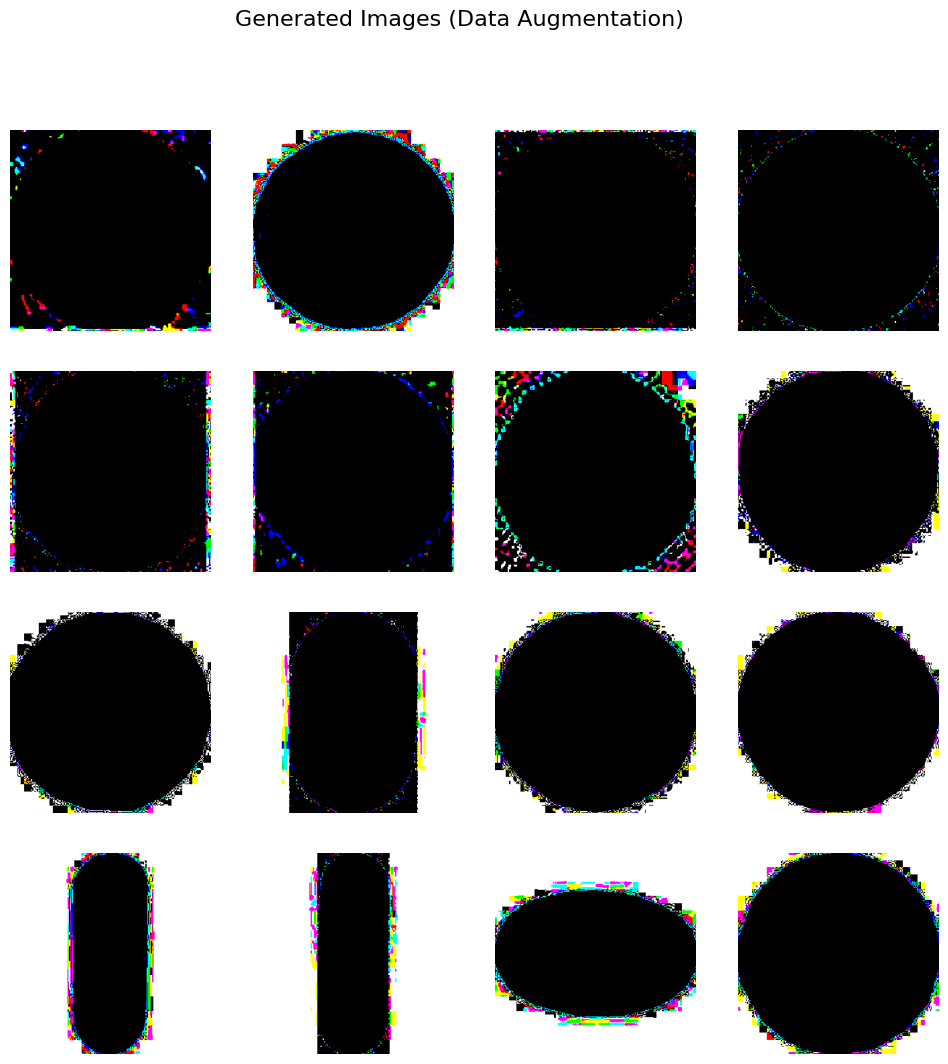

Class indices have been saved to class_indices.json
Found 7350 images belonging to 1845 classes.
Epoch 1/70
1381/1381 [==============================] - ETA: 0s - loss: 5.8255 - accuracy: 0.1266
Epoch 1: val_loss improved from inf to 3.56668, saving model to EfficientNetB3_checkpoints\epoch_01_val_loss_3.5667.h5


TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [1]:
#EfficientB3
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, BatchNormalization, GlobalAveragePooling2D, Dropout, Reshape, Multiply
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.activations import swish
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.image import DirectoryIterator
import json
from tensorflow.keras.optimizers import Adam
import cv2

# 參數設定
IMG_SIZE = 300
BATCH_SIZE = 16
EPOCHS_1 = 70
EPOCHS_2 = 150
PATIENCE = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 1845 #請根據你的資料集調整類別數
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/train"
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/val"
    
# 自定義的順序模組
def build_sequential_block(x, units=512, dropout_rate=0.5):
    x = BatchNormalization()(x)  # 加入 Batch Normalization
    x = Dropout(dropout_rate)(x)  # 加入 Dropout
    x = Dense(units, activation='relu')(x)  # 添加 Dense 層，激活函數為 ReLU
    return x

def se_block(input_tensor, ratio=12): #ratio 8會無法收斂
    """ Squeeze-and-Excitation (SE) Block """
    channel_axis = -1
    channels = input_tensor.shape[channel_axis]
    
    x = GlobalAveragePooling2D()(input_tensor)
    x = Reshape((1, 1, channels))(x)
    
    x = Dense(channels // ratio, activation=swish)(x)
    x = Dense(channels, activation='hard_sigmoid')(x)
    
    # Scale
    x = Multiply()([input_tensor, x])
    return x

def create_model():
    base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False

    # 提取特徵並加入 SE Block
    x = base_model.output
    x = se_block(x)  # 可選的 SE Block

    x = GlobalAveragePooling2D()(x)  # 全局平均池化
    x = build_sequential_block(x, units=2048, dropout_rate=0.5)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model
    
# 資料增強
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # EfficientNetB3 專屬預處理
    #rotation_range=180, # 隨機旋轉
    #brightness_range=[0.7, 1.1],
    #zoom_range=[1.0, 1.5],  # 隨機縮放
    #fill_mode="constant",  # 填充方式
    #cval=0.
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 从 train_generator 中提取一个 batch
images, labels = next(train_generator)
#images = images/255
images = images.astype(np.uint8)

#print(np.min(images), np.max(images), np.mean(images))
# 验证图片的形状
print("Image batch shape:", images.shape)
# 绘制这些图片
plt.figure(figsize=(12, 12))
for i in range(min(16, len(images))):  # 只绘制前 16 张
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])  # 显示图片
    plt.axis('off')  # 去掉坐标轴
plt.suptitle("Generated Images (Data Augmentation)", fontsize=16)
plt.show()

# 獲取類別名稱到索引的映射
class_indices = train_generator.class_indices
# 保存到 JSON 文件
with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Class indices have been saved to class_indices.json")

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 建立模型
model = create_model()

# 編譯模型
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    filepath="EfficientNetB3_checkpoints/epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 設置回調
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6,
    verbose=1
)

# 訓練模型（初始階段）
history = model.fit(
    train_generator,
    epochs=EPOCHS_1,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# 解凍模型並重新訓練
model.trainable = True
for layer in model.layers:
    layer.trainable = True  # 解凍所有層
    
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE / 10),  # 降低學習率
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# 微調模型
history_fine_tune = model.fit(
    train_generator,
    initial_epoch=(EPOCHS_1),
    epochs=EPOCHS_2,
    validation_data=val_generator,
    callbacks=[checkpoint, reduce_lr]
)

# 保存模型
model.save("EfficientNetB3_checkpoints/model_full.h5")

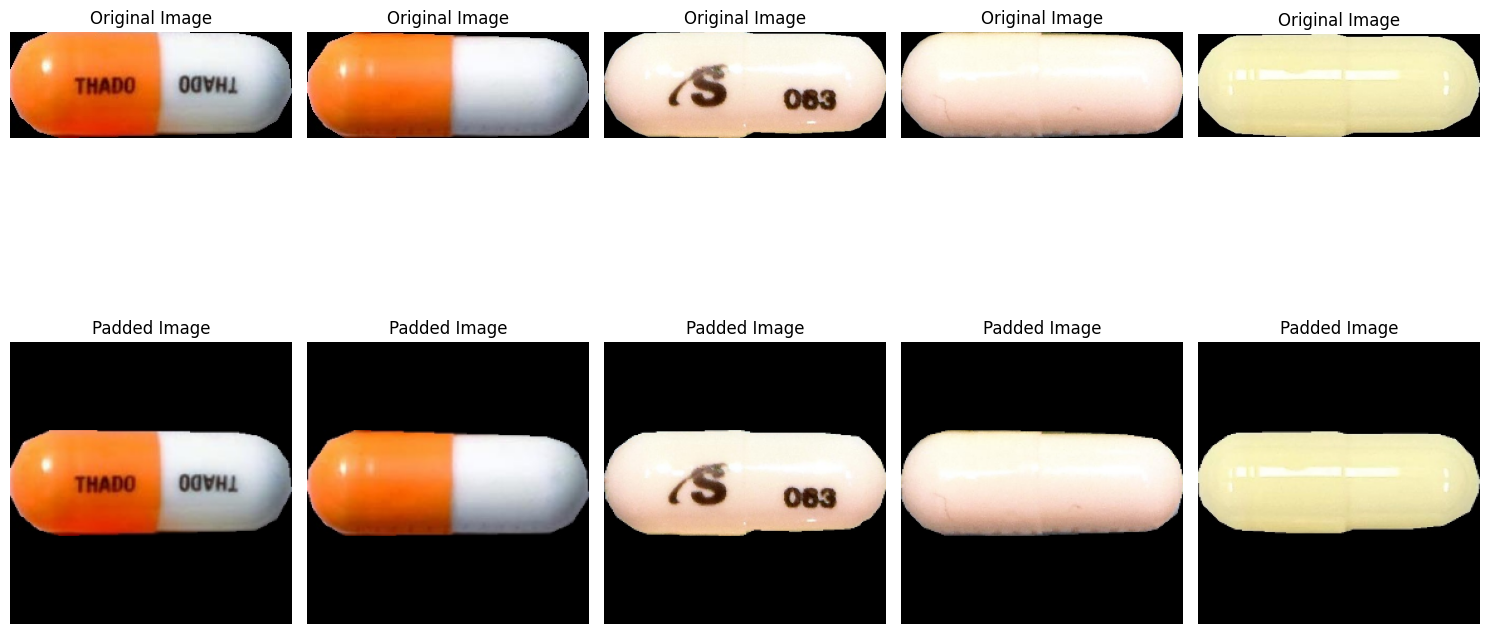

1/1 [==============================] - 0s 32ms/step
3680 3680


Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3680 ticks ([0, ..., 3679]), which exceeds Locator.MAXTICKS (1000).
Locator at

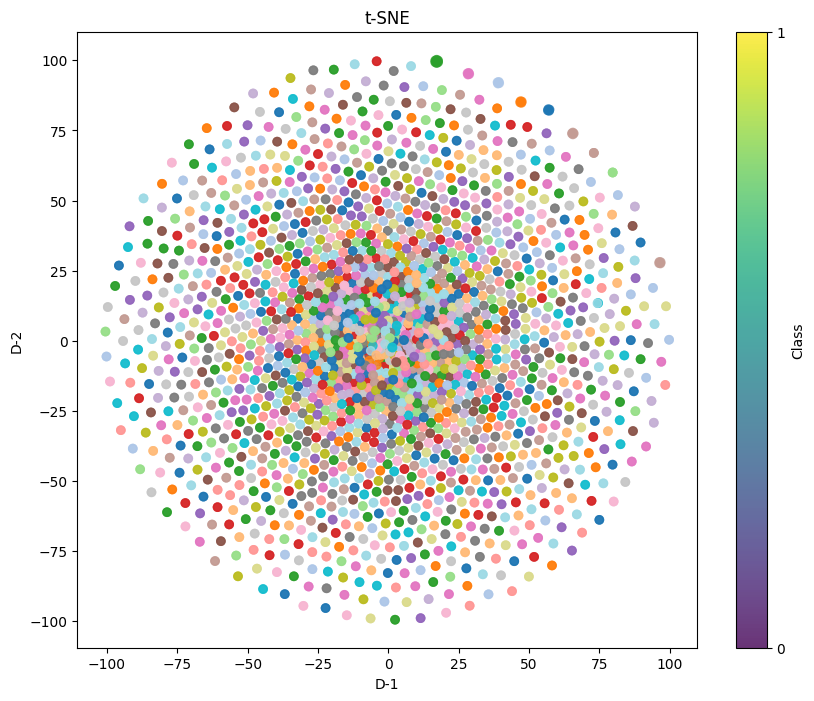

'\n# 繪製 3D 散點圖\ncolors = [get_color(label) for label in val_labels]\n# 創建 3D 散點圖\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection=\'3d\')\n# 使用顏色來繪製 3D 散點圖\nscatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],\n                     c=colors, alpha=0.8)\n# 添加顏色條，顯示每個類別的顏色\nplt.colorbar(scatter, ax=ax, label=\'Class\')\n# 設置標題\nplt.title("3D t-SNE")\n# 顯示圖形\nplt.show()\n'

In [1]:
#Resnet50 + Triplet Loss提取嵌入特徵
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import load_model, Model
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import hashlib

from tensorflow.keras.applications.resnet import preprocess_input

# Helper Function: Load all image paths and labels
def load_image_paths_and_labels(base_dir):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(base_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(class_to_index[class_name])
    
    return image_paths, labels, class_to_index

def pad_image(img, target_size=(224, 224)):
    """
    将图像按最长边缩放后填充到 target_size 大小。
    """
    img = img_to_array(img)  # 转为 numpy 数组
    img_h, img_w, _ = img.shape
    target_h, target_w = target_size

    # 计算缩放比例
    if img_h > img_w:
        scale = target_h / img_h
    else:
        scale = target_w / img_w

    # 按比例缩放图像
    new_h = int(img_h * scale)
    new_w = int(img_w * scale)
    img_resized = tf.image.resize(img, (new_h, new_w))

    # 计算填充边界
    top = (target_h - new_h) // 2
    bottom = target_h - new_h - top
    left = (target_w - new_w) // 2
    right = target_w - new_w - left

    # 使用黑色（像素值为0）填充
    img_padded = tf.image.pad_to_bounding_box(img_resized, top, left, target_h, target_w)

    return img_padded.numpy()  # 转为 numpy 数组返回

# 修改后的嵌入特征提取函数
def extract_embeddings(image_paths, labels, embedding_model):
    embeddings = []
    selected_labels = []  # 用于存储对应的标签
    for img_path, label in zip(image_paths, labels):
        # 加载原始图像
        img = load_img(img_path)
        # 填充至目标尺寸
        img = pad_image(img, target_size=(224, 224))
        # 归一化
        #img = img / 255.0
        # 增加批次维度
        #img = np.expand_dims(img, axis=0)

        #ResNet50預處理
        img = preprocess_input(np.expand_dims(img, axis=0))
        
        # 提取嵌入特征
        embedding = embedding_model.predict(img)
        embeddings.append(embedding.squeeze())  # 去除多余的维度
        selected_labels.append(label)  # 存储对应的标签
        #if len(embeddings) >= 50:  ################### 限制提取数量####################
        #    break
    return np.array(embeddings), np.array(selected_labels)

def visualize_padding(image_paths, num_images=5):
    """
    可视化图像的填充效果。
    """
    plt.figure(figsize=(15, 10))

    for i, img_path in enumerate(image_paths[:num_images]):
        # 加载原始图像
        original_img = load_img(img_path)
        # 填充至目标尺寸
        padded_img = pad_image(original_img, target_size=(IMG_SIZE, IMG_SIZE))

        # 原图与填充图像并排展示
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(padded_img.astype(np.uint8))
        plt.title("Padded Image")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    
# 自定義顏色生成函數
def get_color(label):
    return plt.cm.tab20(int(hashlib.md5(str(label).encode()).hexdigest(), 16) % 20)
    
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_For_Classifier_Training_NonAUG_byLabel_DeleteRepeat"      # 驗證集目錄
val_image_paths, val_labels, _ = load_image_paths_and_labels(VAL_DIR)
IMG_SIZE = 224
# 加載保存的嵌入模型
#embedding_model = load_model("ResNet50_TripletLoss_checkpoints/1211_1/embedding_model_full_1211_1.h5", compile=False)
embedding_model = load_model("ResNet50_checkpoints/1217_1_SE/epoch_139_val_loss_1.2474.h5", compile=False)

# 可视化图像填充效果（在特征提取前）
visualize_padding(val_image_paths, num_images=5)

# 提取驗證數據集的嵌入特徵
val_embeddings, val_labels = extract_embeddings(val_image_paths, val_labels, embedding_model)
print(len(val_embeddings), len(val_labels))
# 使用 t-SNE 將嵌入特徵降維到 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(val_embeddings)
# 3D(2D/3D擇一)
#tsne_3d = TSNE(n_components=3, random_state=42)
#embeddings_3d = tsne_3d.fit_transform(val_embeddings)

# 獲取類別名稱
index_to_class = {v: k for k, v in _.items()}
labels_text = [index_to_class[label] for label in val_labels]

# 繪製 2D 散點圖
# 為每個類別生成顏色
colors = [get_color(label) for label in val_labels]
# 創建 2D 散點圖
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, alpha=0.8)
# 添加顏色條，顯示每個類別的顏色
plt.colorbar(scatter, ticks=range(len(val_labels)), label='Class')
# 設置標題和坐標軸標籤
plt.title("t-SNE")
plt.xlabel("D-1")
plt.ylabel("D-2")
# 顯示圖形
plt.show()
'''
# 繪製 3D 散點圖
colors = [get_color(label) for label in val_labels]
# 創建 3D 散點圖
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# 使用顏色來繪製 3D 散點圖
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
                     c=colors, alpha=0.8)
# 添加顏色條，顯示每個類別的顏色
plt.colorbar(scatter, ax=ax, label='Class')
# 設置標題
plt.title("3D t-SNE")
# 顯示圖形
plt.show()
'''

Found 10019 images belonging to 1903 classes.
627/627 [==============================] - 35s 49ms/step
驗證集準確率: 0.00


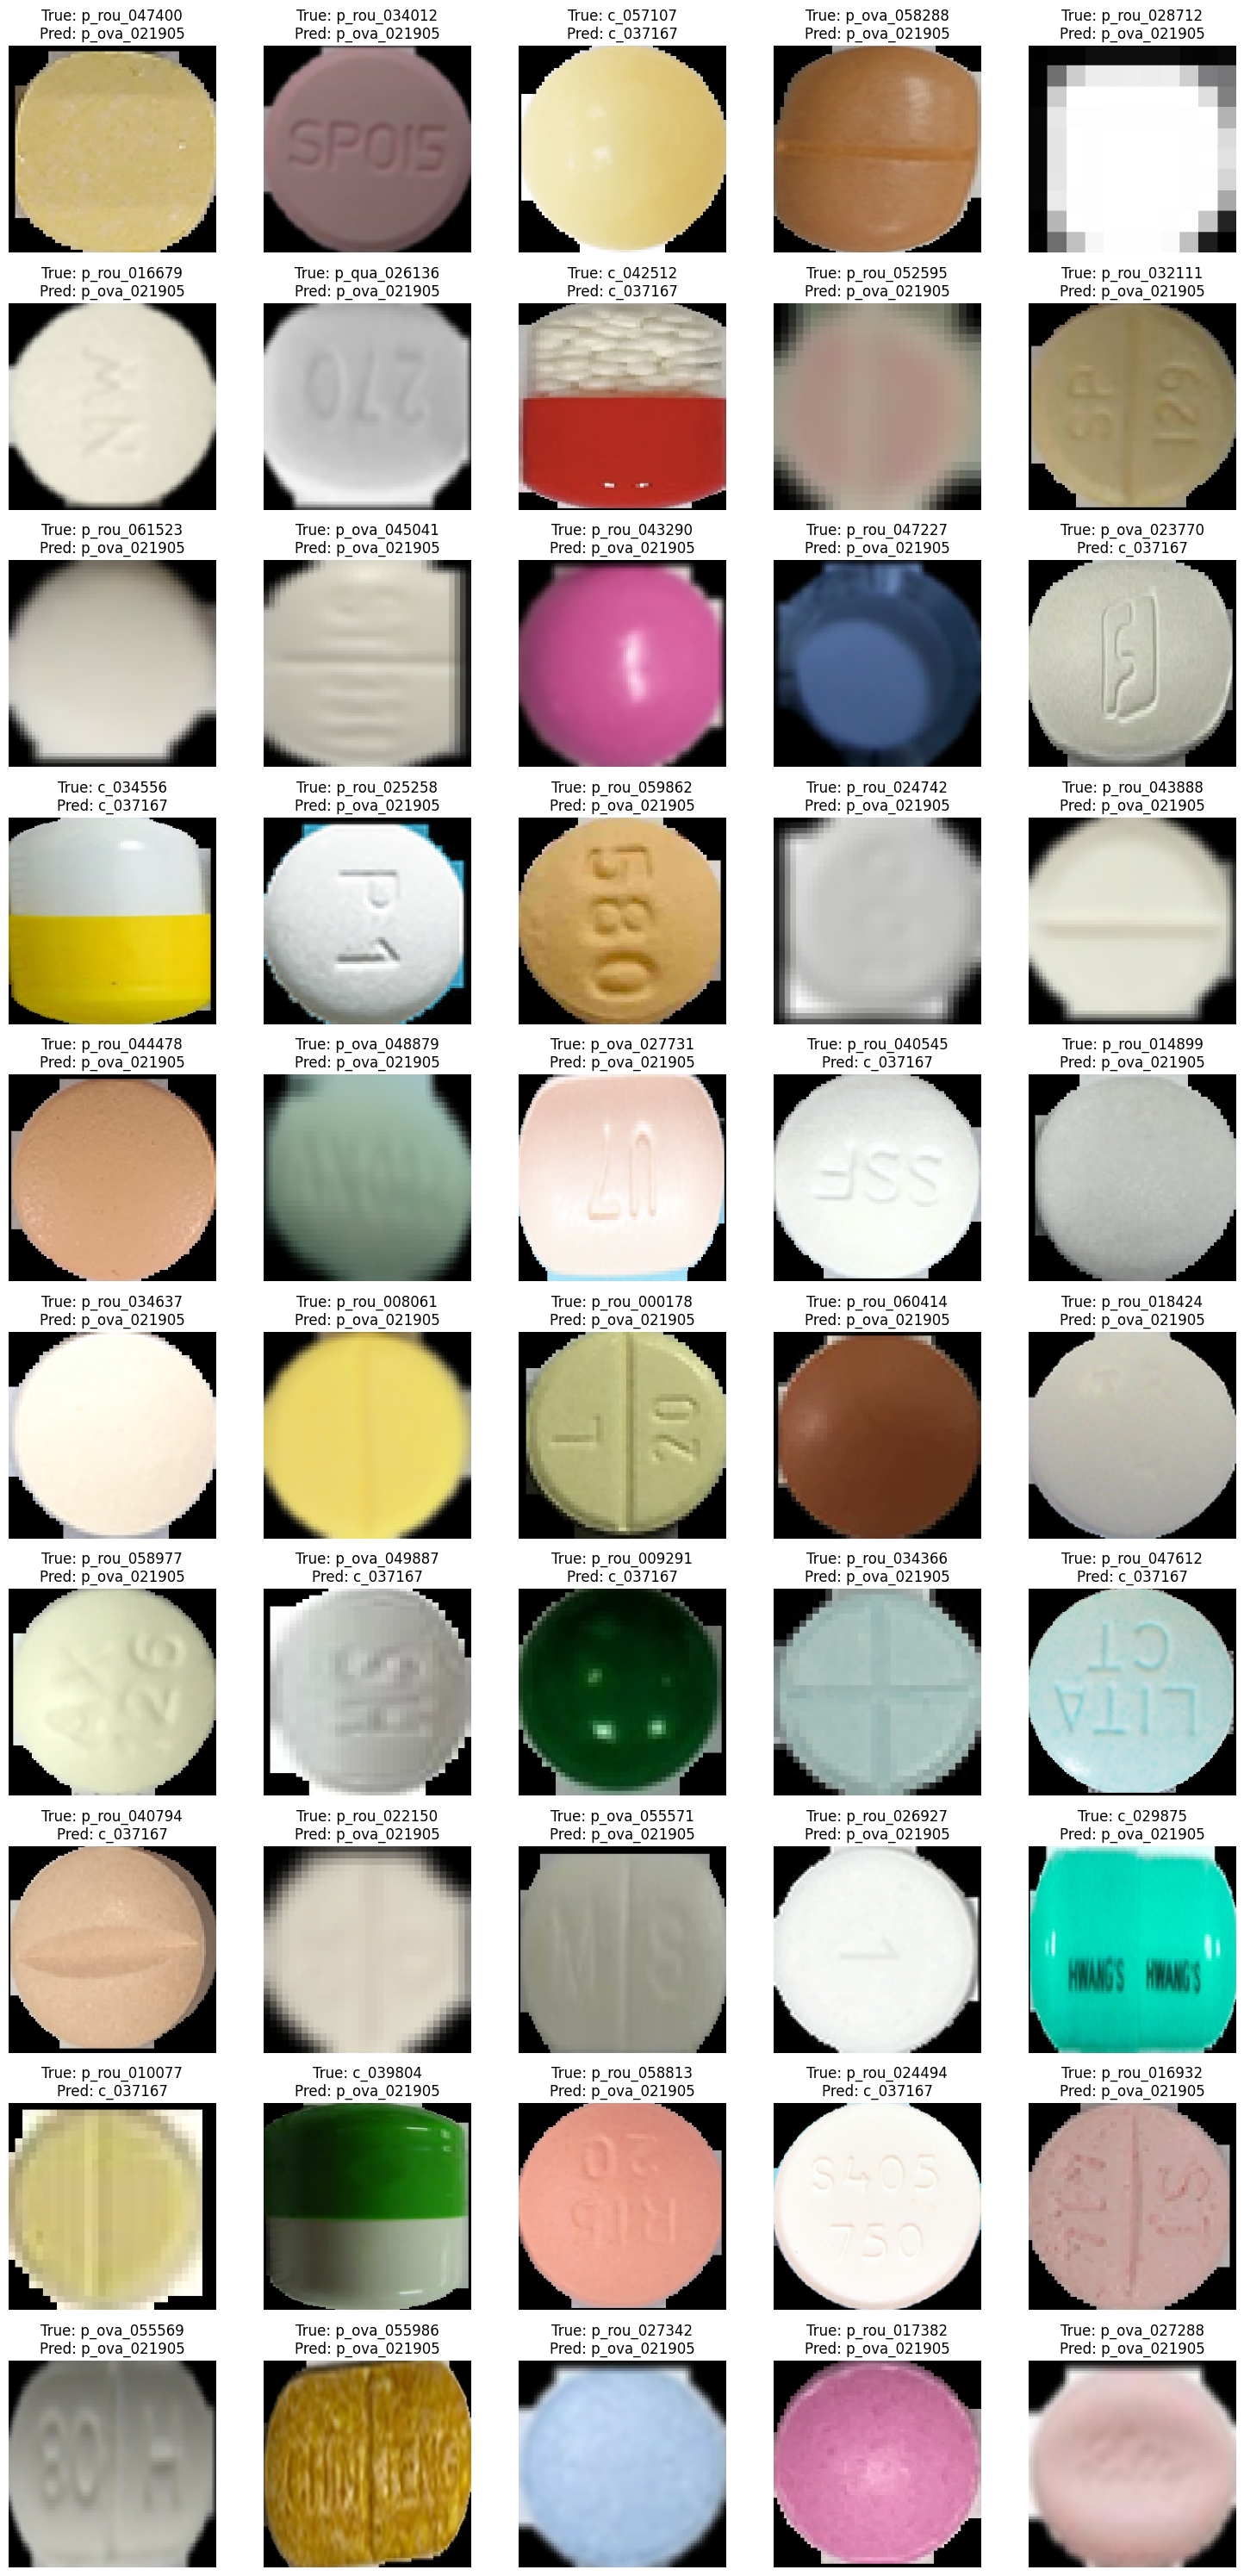

In [3]:
#inceptionv3用的測試
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# 載入模型（確保你提供正確的模型檔案路徑）
MODEL_PATH = "ResNet50_TripletLoss_checkpoints/embedding_model_full.h5"
model = load_model(MODEL_PATH)

# 驗證資料的資料夾路徑
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_NonGaussianNoise_BasedOnAUG/val"

# 圖片大小和批次大小
IMG_HEIGHT, IMG_WIDTH = 224, 224  # 根據你的模型設置大小
BATCH_SIZE = 16

# 驗證資料生成器
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # 確保圖片的順序與標籤一致
)

# 預測
val_generator.reset()  # 確保生成器從頭開始
predictions = model.predict(val_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# 真實標籤
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# 計算準確率
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"驗證集準確率: {accuracy:.2f}")

# 可視化結果
def visualize_predictions(val_generator, true_classes, predicted_classes, class_labels, num_images=10):
    """隨機選擇圖片，顯示真實和預測標籤"""
    # 從驗證生成器中取出所有圖片和標籤
    val_generator.reset()  # 確保生成器從頭開始
    images, labels = [], []
    for _ in range(len(val_generator)):
        batch_images, batch_labels = next(val_generator)
        images.extend(batch_images)
        labels.extend(batch_labels)
    images = np.array(images)
    labels = np.array(labels)

    # 隨機選擇圖片索引
    indices = np.random.choice(len(images), num_images, replace=False)
    selected_images = images[indices]
    true_labels = [class_labels[true_classes[idx]] for idx in indices]
    predicted_labels = [class_labels[predicted_classes[idx]] for idx in indices]

    # 計算行列數
    cols = 5  # 每行顯示的圖片數
    rows = (num_images + cols - 1) // cols  # 確保容納所有圖片

    # 繪圖
    plt.figure(figsize=(15, rows * 3))  # 調整圖表大小
    for i, (img, true_label, pred_label) in enumerate(zip(selected_images, true_labels, predicted_labels)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 可視化10張圖片
visualize_predictions(val_generator, true_classes, predicted_classes, class_labels, num_images=50)

In [2]:
#隨機提取每個類別每個尺寸下的隨機一張影像

import os
import shutil
import random

def organize_random_files(input_base_dir, output_base_dir):
    # 常見的影像檔案格式
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    
    # 確認基底資料夾是否存在
    if not os.path.exists(input_base_dir):
        print(f"輸入目錄不存在: {input_base_dir}")
        return
    
    # 確保輸出基底資料夾存在
    os.makedirs(output_base_dir, exist_ok=True)
    
    # 遍歷類別資料夾
    for category in os.listdir(input_base_dir):
        category_path = os.path.join(input_base_dir, category)
        
        # 僅處理資料夾
        if not os.path.isdir(category_path):
            continue
        
        # 如果是 capsule 類別，直接進入尺寸層級
        if category.lower() == "capsule":
            subcategories = [""]
        else:
            # 如果是 pill 類別，需進入細分類別層級
            subcategories = os.listdir(category_path)
        
        for subcategory in subcategories:
            subcategory_path = os.path.join(category_path, subcategory) if subcategory else category_path
            
            # 確認細分類別是否為資料夾
            if subcategory and not os.path.isdir(subcategory_path):
                continue
            
            # 遍歷尺寸資料夾
            for size in os.listdir(subcategory_path):
                size_path = os.path.join(subcategory_path, size)
                
                # 確認尺寸層級是否為資料夾
                if not os.path.isdir(size_path):
                    continue
                
                # 取得該尺寸資料夾中的所有影像檔案
                image_files = [f for f in os.listdir(size_path) if f.lower().endswith(valid_extensions)]
                
                if not image_files:
                    print(f"尺寸資料夾無影像: {size_path}")
                    continue
                
                # 隨機選取一張影像|
                random_image = random.choice(image_files)
                
                # 確保尺寸名稱為有效的數字+mm格式
                size_prefix = f"{size}"
                
                # 建立新的檔名，將尺寸加在檔名前
                new_filename = f"{size_prefix}_{random_image}"
                
                # 建立目標資料夾結構
                if subcategory:
                    target_dir = os.path.join(output_base_dir, category, subcategory)
                else:
                    target_dir = os.path.join(output_base_dir, category)
                
                os.makedirs(target_dir, exist_ok=True)
                
                # 定義來源和目標路徑
                src_file = os.path.join(size_path, random_image)
                dst_file = os.path.join(target_dir, new_filename)
                
                # 複製檔案
                shutil.copy(src_file, dst_file)
                print(f"隨機選取並複製: {src_file} -> {dst_file}")

# 使用範例
input_directory = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_SizeDistribute_forLabel_Original"  # 原始基底目錄
output_directory = "C:/Users/V003479/Desktop/Project/ONNX-YOLOv8-Instance-Segmentation_TaiwanPill/Taiwan_Pill_Match_Database_Matting_RearrangeSize/測試sample/每類每個大小取2張不同做驗證"  # 輸出基底目錄
organize_random_files(input_directory, output_directory)

隨機選取並複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_SizeDistribute_forLabel_Original\capsule\10_2mm\衛署藥製字第029562號-20240926-002.jpeg -> C:/Users/V003479/Desktop/Project/ONNX-YOLOv8-Instance-Segmentation_TaiwanPill/Taiwan_Pill_Match_Database_Matting_RearrangeSize/測試sample/每類每個大小取2張不同做驗證\capsule\10_2mm_衛署藥製字第029562號-20240926-002.jpeg
隨機選取並複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_SizeDistribute_forLabel_Original\capsule\14mm\衛署藥製字第044038號-20230909-001.png -> C:/Users/V003479/Desktop/Project/ONNX-YOLOv8-Instance-Segmentation_TaiwanPill/Taiwan_Pill_Match_Database_Matting_RearrangeSize/測試sample/每類每個大小取2張不同做驗證\capsule\14mm_衛署藥製字第044038號-20230909-001.png
隨機選取並複製: C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/Taiwan_Pill_SizeDistribute_forLabel_Original\capsule\14_6mm\衛署藥製字第044282號-20240227-002.jpg -> C:/Users/V003479/Desktop/Project/ONNX-YOLOv8-Instance-Segmentation_TaiwanPill/Taiwan_Pill_Match_Database_Matting_RearrangeSize/測試sample/每類每個大小取2張不同做驗證\c

In [ ]:
#ResNet50 + ArcFace Loss
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

# 超參數設置
IMG_SIZE = 224
EMBEDDING_DIM = 512
SCALE = 16.0
MARGIN = 0.2
BATCH_SIZE = 32
EPOCH_1 = 10
EPOCH_2 = 30
PATIENCE = 5
LR = 0.001
TRAIN_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/train"
VAL_DIR = "C:/Users/V003479/Desktop/Project/TaiwanPill_TEST/trainData_GaussianNoise_BasedOnAUG_byLabel_DeleteRepeat/val"

# 隨機調整亮度
def adjust_brightness_randomly(image, delta=0.3):
    return tf.image.random_brightness(image, max_delta=delta)
# 隨機旋轉
def random_rotate(image, max_angle=45):
    angle = random.uniform(-max_angle, max_angle) * np.pi / 180.0  # 將角度轉換為弧度
    return tfa.image.rotate(image, angle)
# 隨機縮放
def random_zoom(image, zoom_factor_range=(0.6, 1.0)):
    zoom_factor = random.uniform(zoom_factor_range[0], zoom_factor_range[1])  # 隨機縮放因子
    height, width, _ = image.shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    image = tf.image.resize(image, (new_height, new_width))
    # 確保圖片尺寸為224x224
    return tf.image.resize_with_crop_or_pad(image, target_height=IMG_SIZE, target_width=IMG_SIZE)

# 整合所有增強功能的函數
def augment_image(image):
    # 隨機旋轉
    image = random_rotate(image)
    # 隨機縮放
    image = random_zoom(image)
    # 隨機亮度調整
    image = adjust_brightness_randomly(image, delta=0.1)
    return image

# 加載影像路徑與標籤
def load_image_paths_and_labels(base_dir):
    image_paths = []
    labels = []
    class_names = sorted(os.listdir(base_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_name))
            labels.append(class_to_index[class_name])

    return image_paths, labels, class_to_index

# 資料生成器
class ArcFaceDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size, num_classes):
        self.image_paths = np.array(image_paths)
        self.labels = np.array(labels)
        self.batch_size = batch_size
        self.num_classes = num_classes

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_images = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        images = np.array([self.load_and_preprocess(img_path) for img_path in batch_images])
        return images, np.array(batch_labels).reshape(-1)  # 確保是展平的一維數組

    def load_and_preprocess(self, img_path):
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img) / 255.0
        img = tf.convert_to_tensor(img, dtype=tf.float32)
        img = augment_image(img)
        return img.numpy()

# ArcFace Loss 層
class ArcFaceLoss(tf.keras.losses.Loss):
    def __init__(self, scale=64.0, margin=0.5, num_classes=None, **kwargs):
        super(ArcFaceLoss, self).__init__(**kwargs)
        self.scale = scale
        self.margin = margin
        self.num_classes = num_classes
    
        self.class_embeddings = tf.Variable(
            initial_value=tf.random.uniform([num_classes, EMBEDDING_DIM], minval=-1, maxval=1),
            trainable=True,
            name="class_embeddings"
        )
        self.class_embeddings.assign(tf.nn.l2_normalize(self.class_embeddings, axis=1))

    def call(self, y_true, y_pred):
        y_pred = tf.nn.l2_normalize(y_pred, axis=1)
        class_embeddings_normalized = tf.nn.l2_normalize(self.class_embeddings, axis=1)
    
        cosine_similarity = tf.matmul(y_pred, class_embeddings_normalized, transpose_b=True)
        cosine_similarity = tf.clip_by_value(cosine_similarity, -0.999, 0.999)
    
        theta = tf.acos(cosine_similarity)
        margin = tf.one_hot(tf.squeeze(y_true), depth=self.num_classes) * self.margin  # 確保 y_true 是一維的
        theta_with_margin = theta + margin
    
        logits_with_margin = tf.cos(theta_with_margin) * self.scale
    
        # 確保 y_true 是整數型別
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)  # 將 y_true 展平為一維
    
        # 返回損失
        return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true, logits_with_margin, from_logits=True))


# 構建嵌入模型
def create_arcface_model(num_classes):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # 凍結所有層
    for layer in base_model.layers:
        layer.trainable = False
    
    # 解凍最後一個 block
    for layer in base_model.layers[-30:]:  # 假設 ResNet50 最後 30 層解凍
        layer.trainable = True

    x = Flatten()(base_model.output)
    embeddings = Dense(EMBEDDING_DIM, activation=None)(x)
    embeddings = tf.keras.layers.Lambda(lambda x: tf.nn.l2_normalize(x, axis=1))(embeddings)
    return Model(inputs=base_model.input, outputs=embeddings)

# 加載數據
train_image_paths, train_labels, class_to_index = load_image_paths_and_labels(TRAIN_DIR)
val_image_paths, val_labels, _ = load_image_paths_and_labels(VAL_DIR)

num_classes = len(class_to_index)
train_gen = ArcFaceDataGenerator(train_image_paths, train_labels, BATCH_SIZE, num_classes)
val_gen = ArcFaceDataGenerator(val_image_paths, val_labels, BATCH_SIZE, num_classes)

# 測試數據生成器
batch_data, batch_labels = train_gen[0]
print("Image batch shape:", batch_data.shape)
print("Label batch shape:", batch_labels.shape)

# 構建 ArcFace 模型
arcface_model = create_arcface_model(num_classes)

# 編譯模型
arcface_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=LR, momentum=0.9, nesterov=True),
    loss=ArcFaceLoss(scale=SCALE, margin=MARGIN, num_classes=num_classes),
    metrics=["accuracy"]
)

# 回調函數
checkpoint = ModelCheckpoint(
    filepath="ResNet50_ArcFaceLoss_checkpoints/epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 設置回調
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True
)

# 初期訓練模型
os.makedirs("ResNet50_ArcFaceLoss_checkpoints", exist_ok=True)

history = arcface_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCH_1,
    callbacks=[checkpoint, early_stopping]
)

# 解凍模型並重新訓練
for layer in arcface_model.layers:
    layer.trainable = True
    
# 調整學習率為原來的 1/10
arcface_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=LR * 0.1, momentum=0.9, nesterov=True),
    loss=ArcFaceLoss(scale=SCALE, margin=MARGIN, num_classes=num_classes),
    metrics=["accuracy"]
)

# 微調模型
history_finetune = arcface_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCH_2,  # 微調的額外 epoch 數
    callbacks=[checkpoint, early_stopping]
)

# 保存模型
arcface_model.save("ResNet50_ArcFaceLoss_checkpoints/arcface_model_full.h5")

C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\V003479\.conda\envs\PillNet_py39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
Epoch 1/10
265/690 [==========>...................] - ETA: 3:17 - loss: 11.0877 - accuracy: 0.0014